In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [80]:
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

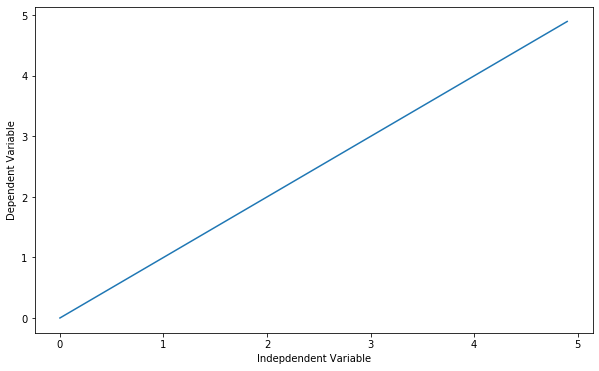

In [81]:
##You can adjust the slope and intercept to verify the changes in the graph
a = 1
b = 0

Y= a * X + b 

plt.plot(X, Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [82]:
df = pd.read_csv("C:/Users/user1/Documents/Tensorflow/Edex IBM TensorFlow/FuelConsumptionCo2.csv")

In [83]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [84]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

In [85]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a * train_x + b

In [86]:
loss = tf.reduce_mean(tf.square(y - train_y))

In [87]:
loss

<tf.Tensor 'Mean_3:0' shape=() dtype=float32>

In [88]:
optimizer = tf.train.GradientDescentOptimizer(0.9)

In [89]:
train = optimizer.minimize(loss)

In [90]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [91]:
loss_values = []
train_data = []
for step in range(1000):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

0 26992.574 1047.2789 316.5849
5 1.7951696e+18 -8413300700.0 -2156011500.0
10 1.2911993e+32 7.1352622e+16 1.8284966e+16
15 inf -6.051382e+23 -1.5507392e+23
20 inf 5.132126e+30 1.3151688e+30
25 inf -4.3525204e+37 -1.1153864e+37
30 nan nan nan
35 nan nan nan
40 nan nan nan
45 nan nan nan
50 nan nan nan
55 nan nan nan
60 nan nan nan
65 nan nan nan
70 nan nan nan
75 nan nan nan
80 nan nan nan
85 nan nan nan
90 nan nan nan
95 nan nan nan
100 nan nan nan
105 nan nan nan
110 nan nan nan
115 nan nan nan
120 nan nan nan
125 nan nan nan
130 nan nan nan
135 nan nan nan
140 nan nan nan
145 nan nan nan
150 nan nan nan
155 nan nan nan
160 nan nan nan
165 nan nan nan
170 nan nan nan
175 nan nan nan
180 nan nan nan
185 nan nan nan
190 nan nan nan
195 nan nan nan
200 nan nan nan
205 nan nan nan
210 nan nan nan
215 nan nan nan
220 nan nan nan
225 nan nan nan
230 nan nan nan
235 nan nan nan
240 nan nan nan
245 nan nan nan
250 nan nan nan
255 nan nan nan
260 nan nan nan
265 nan nan nan
270 nan nan nan
275

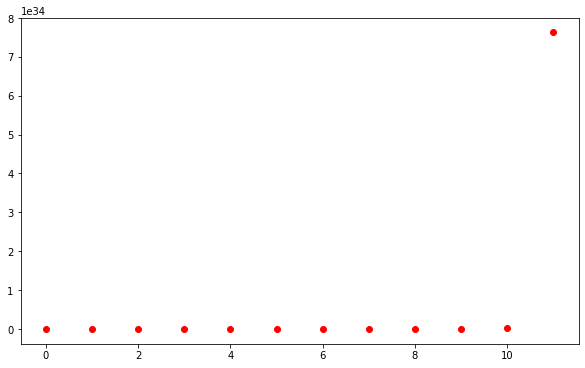

In [92]:
plt.plot(loss_values, 'ro')

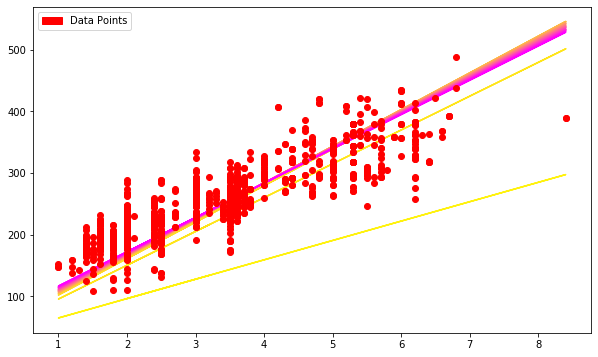

In [61]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()

In [30]:
train_x

array([[2. ],
       [2.4],
       [1.5],
       ...,
       [3. ],
       [3.2],
       [3.2]])

In [78]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
